# Informe de avance Astroinformática
## Carlos Molina
## Gabriel Molina
## Cristóbal Scheihing

# Introducción
En este documento se encuentra nuestro avance 

In [451]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error
import sklearn.linear_model as lm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import pylab 
import scipy.stats as stats
import sympy 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC as SVM
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from __future__ import print_function
from scipy.io import wavfile
from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from mpl_toolkits.axes_grid.inset_locator import inset_axes
from sklearn.svm import SVR
from scipy.stats import iqr
from sklearn.metrics import median_absolute_error
from astropy.cosmology import WMAP9 as cosmo
import astropy.units as u
from astropy.constants import G,c,M_earth

In [476]:
def arboles(minimo, maximo,criterio):
    profundidad = range(minimo,maximo)
    error_train= []
    error_test = []
    
    for c in profundidad:
        model= Tree()
        model.set_params(max_depth=c,criterion=criterio,splitter='best')
        model.fit(X_train,y_train)
        yhat_train = model.predict(X_train)
        yhat_test = model.predict(X_test)
        error_train.append(1-accuracy_score(y_train, yhat_train))
        error_test.append(1-accuracy_score(y_test, yhat_test))

            
    plt.figure(figsize=(15,10))
    plot = plt.subplot(1,1,1)
    plot.plot(profundidad, error_train, label='Error de Entrenamiento')
    plot.plot(profundidad, error_test, label='Error de Prueba Dataset')
    plt.legend()
    plt.xlabel('Profundidad del Árbol')
    plt.ylabel('Error de Clasificación')
    plt.title('Árbol de Desición con criterio ' + criterio)
    plt.axis([minimo,maximo,0.0000, 0.001])

    plt.show()
    
    
def compute_mass(redshift,openning):
    cte = c*c/(2*G)
    return (cte*cosmo.kpc_proper_per_arcmin(redshift)*openning)

In [453]:
df = pd.read_csv("./DATA-astroinf.csv")
df.head()

,u,g,r,i,z,class,redshift,redshift_err
0,16.46322,15.49256,15.14610,15.00817,14.83415,GALAXY,0.012641,5.975708E-06
1,17.23730,15.65943,14.76368,14.32308,13.97611,GALAXY,0.086139,1.735132E-05
2,19.26072,17.97265,17.27236,16.88940,16.65260,GALAXY,0.103297,2.110899E-05
3,18.87348,17.84478,17.35933,17.11581,16.95407,GALAXY,0.076046,9.803565E-06
4,18.88721,17.34640,16.52588,16.08977,15.78733,GALAXY,0.075763,8.73617E-06


In [454]:
new_df = df
new_df = new_df.drop(new_df[new_df['u'] > 25].index)
new_df = new_df.drop(new_df[new_df['g'] > 25].index)
new_df = new_df.drop(new_df[new_df['r'] > 25].index)
new_df = new_df.drop(new_df[new_df['i'] > 25].index)
new_df = new_df.drop(new_df[new_df['z'] > 25].index)
new_df = new_df.drop(new_df[new_df['u'] < -0.0072].index)
new_df = new_df.drop(new_df[new_df['g'] < -0.0072].index)
new_df = new_df.drop(new_df[new_df['r'] < -0.0072].index)
new_df = new_df.drop(new_df[new_df['i'] < -0.0072].index)
new_df = new_df.drop(new_df[new_df['z'] < -0.0072].index)
new_df['u-g'] = new_df.apply(lambda x: x['u'] - x['g'], axis=1)
new_df['g-r'] = new_df.apply(lambda x: x['g'] - x['r'], axis=1)
new_df['r-i'] = new_df.apply(lambda x: x['r'] - x['i'], axis=1)
new_df['i-z'] = new_df.apply(lambda x: x['i'] - x['z'], axis=1)
#new_df['index'] = new_df.apply(lambda x: "[-0.0072,1,34]" if x['redshift'] < 1.34 else "[1.34,2.78]" if x['redshift'] < 2.68 else "[2.68,4.02]" if x['redshift']<4.02 else "[4.02,5.36]" if x['redshift'] <5.36 else "[5.36,6.701]",axis=1)
new_df['index'] = new_df.apply(lambda x: 1 if x['redshift'] < 1.34 else 2 if x['redshift'] < 2.68 else 3 if x['redshift']<4.02 else 4 if x['redshift'] <5.36 else 5,axis=1)
new_df.drop(['u','g','r','i','z','class','redshift_err'],axis=1,inplace=True)
new_df.head()

,redshift,u-g,g-r,r-i,i-z,index
0,0.012641,0.97066,0.34646,0.13793,0.17402,1
1,0.086139,1.57787,0.89575,0.44060,0.34697,1
2,0.103297,1.28807,0.70029,0.38296,0.23680,1
3,0.076046,1.02870,0.48545,0.24352,0.16174,1
4,0.075763,1.54081,0.82052,0.43611,0.30244,1


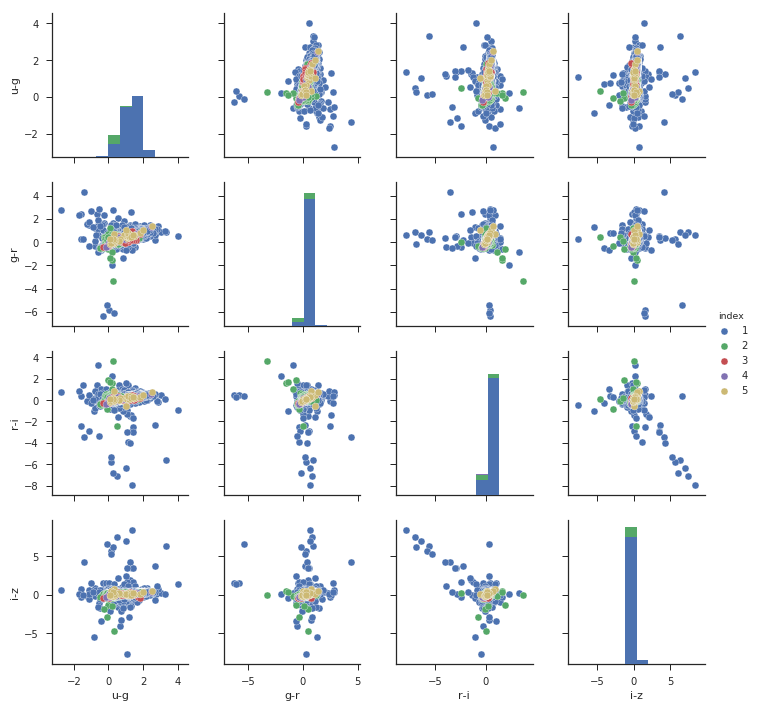

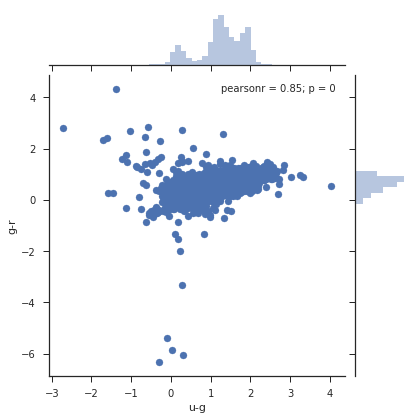

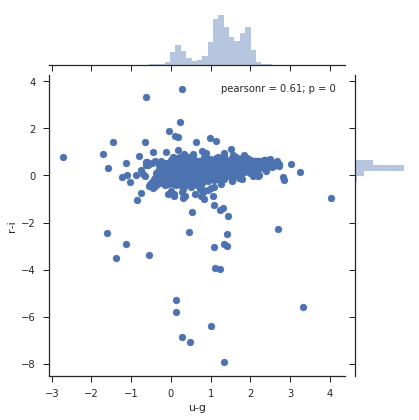

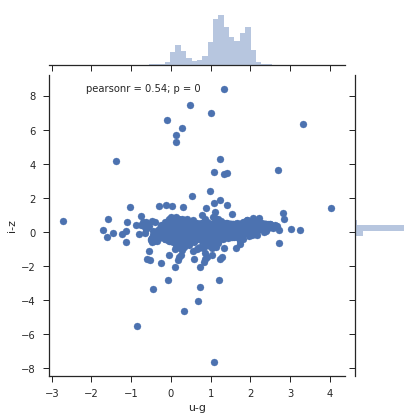

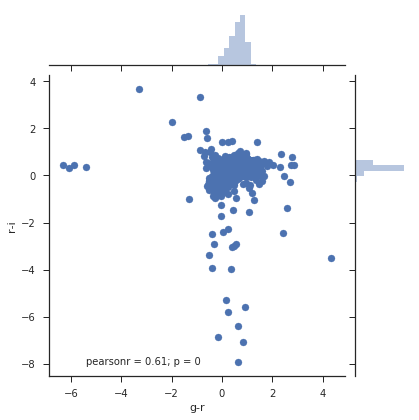

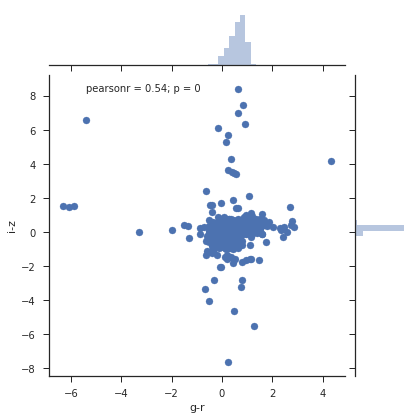

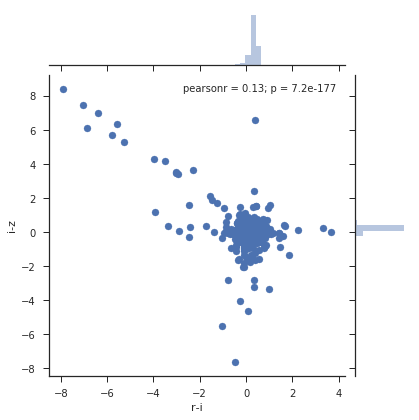

In [455]:
sns.set(style="ticks",color_codes=True)
sns.pairplot(new_df,vars=["u-g", "g-r", "r-i", "i-z"],hue="index")
sns.jointplot(new_df['u-g'], new_df['g-r'], kind='scatter')
sns.jointplot(new_df['u-g'], new_df['r-i'], kind='scatter')
sns.jointplot(new_df['u-g'], new_df['i-z'], kind='scatter')
sns.jointplot(new_df['g-r'], new_df['r-i'], kind='scatter')
sns.jointplot(new_df['g-r'], new_df['i-z'], kind='scatter')
sns.jointplot(new_df['r-i'], new_df['i-z'], kind='scatter')
plt.show()

In [458]:
scaler = StandardScaler() 
Ydf= new_df.copy()
Xdf = new_df.copy()
Xdf.drop(['index'],axis=1,inplace=True)
Ydf.drop(['redshift','u-g','g-r','r-i','i-z'],axis=1,inplace=True)
y_scaled = pd.DataFrame(scaler.fit_transform(Ydf), columns=Ydf.columns)
X_scaled = pd.DataFrame(scaler.fit_transform(Xdf), columns=Xdf.columns)
y = Ydf['index']
X = X_scaled
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [459]:
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(X_train, y_train)
yhat_train = linreg.predict(X_train)
yhat_test = linreg.predict(X_test)
print(median_absolute_error(y_train, yhat_train))
print(median_absolute_error(y_test, yhat_test))

1.03166819108
1.03313223555


In [460]:
model= SVM()
model.set_params(C=20,kernel='rbf')
model.fit(X_train,y_train)
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)
print(model.score(X_test,y_test))

0.991886240067


In [461]:
model= Tree()
model.set_params(max_depth=2,criterion='gini',splitter='best')
model.fit(X_train,y_train)
yhat_test = model.predict(X_test)
yhat_train = model.predict(X_train)
print("Error de Clasificación Train: %f"%(1-accuracy_score(y_train, yhat_train)))
print("Error de Clasificación Test: %f"%(1-accuracy_score(y_test, yhat_test)))

Error de Clasificación Train: 0.001422
Error de Clasificación Test: 0.001338


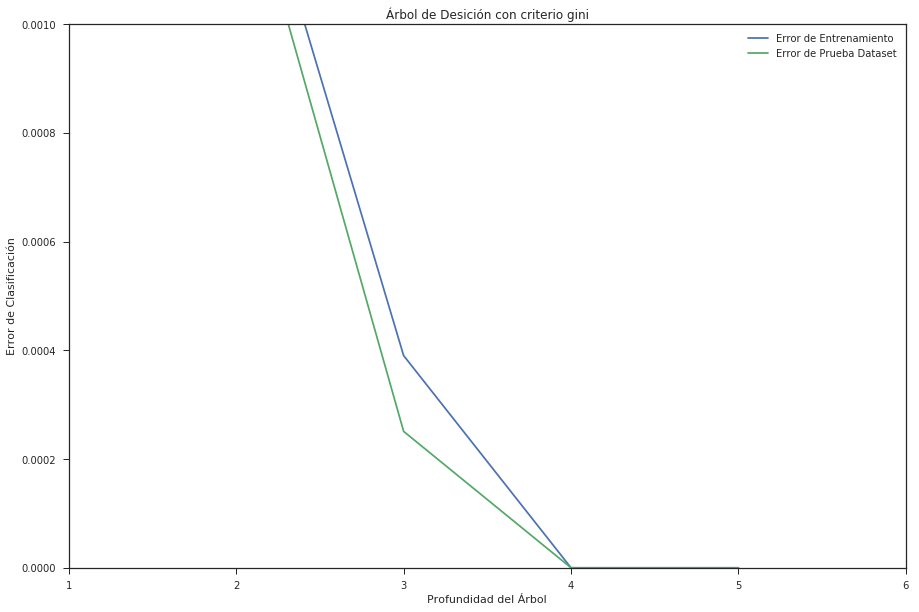

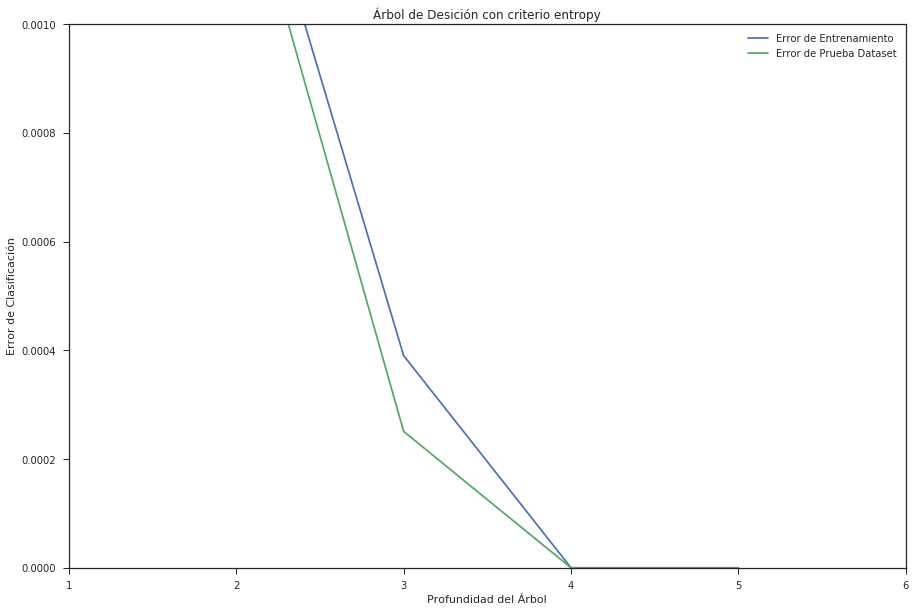

In [462]:
arboles(1,6,'gini')
arboles(1,6,'entropy')

In [477]:
Z = 0.1
theta = 0.5 * u.arcsec
M = compute_mass(Z,theta)
weight = M.to('kg')
weight.to('M_sun')

<Quantity 9739233072540018.0 solMass>

In [478]:
weight.to('M_earth')

<Quantity 3.2426394574252377e+21 earthMass>